# Домашняя работа №1

In [2]:
import numpy as np
import pylab as pl
import pandas as pd
import warnings
import math

from matplotlib import pyplot as plt
from scipy import linalg


warnings.filterwarnings("ignore")

## Задание 1

Изобразите с помощью matplotlib. Изобразите точку x + 2y + 3z. Найдите угол между векторами x, y и x, z. 

In [2]:
x = np.array([1, 1])
y = np.array([2, 0])
z = np.array([0, 2])

[5 7]


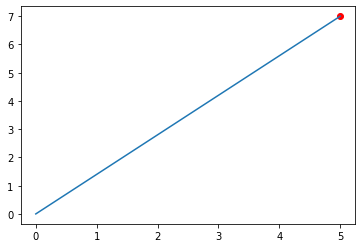

In [17]:
a = x + 2*y + 3*z
print(a)
plt.plot(a[0], a[1], 'ro')
plt.plot([0,a[0]], [0,a[1]])

plt.show()

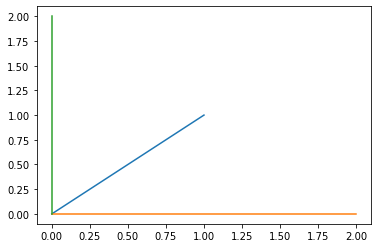

In [26]:
plt.plot([0,x[0]], [0,x[1]])
plt.plot([0,y[0]], [0,y[1]])
plt.plot([0,z[0]], [0,z[1]])
plt.show()

In [37]:
cos_xy = (x[0]*y[0] + x[1]*y[1])/((x[0]**2 + x[1]**2)**0.5 * (y[0]**2 + y[1]**2)**0.5)
acos_xy = math.acos(cos_xy)
cos_xz = (x[0]*z[0] + x[1]*z[1])/((x[0]**2 + x[1]**2)**0.5 * (z[0]**2 + z[1]**2)**0.5)
acos_xz = math.acos(cos_xz)
print(f'Угол между векторами x, y - {math.degrees(acos_xy)}')
print(f'Угол между векторами x, z - {math.degrees(acos_xz)}')

Угол между векторами x, y - 45.00000000000001
Угол между векторами x, z - 45.00000000000001


## Задание 2

Загрузите модель человека. Найдите расстояние от правой кисти до позвоночника

In [3]:
ns = ['type', 'x', 'y', 'z']
# read points for joints
dfJointsVertexes = pd.read_csv('joints.txt', sep=' ', names = ns)
axis_sort = 'x' 
df = dfJointsVertexes.sort_values(by=[axis_sort])

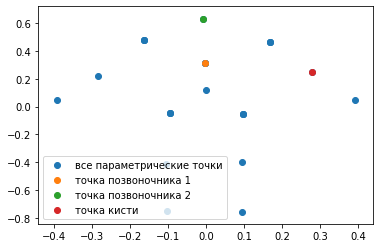

In [31]:
plt.scatter(df.x, df.y)

plt.scatter(df.x[9], df.y[9])
plt.scatter(df.x[11], df.y[11])
plt.scatter(df.x[15], df.y[15])
plt.legend(['все параметрические точки', 'точка позвоночника 1','точка позвоночника 2', 'точка кисти'])

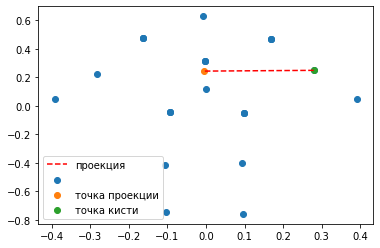

In [33]:
v = np.array([df.x[9] - df.x[11], df.y[9] - df.y[11]])
w = np.array([df.x[15],df.y[15]])

# строим проекцию 
cv = 0 + (np.dot(w,v))/np.dot(v,np.transpose(v))*v

# линия между v и cv
plt.plot([w[0],cv[0]],[w[1],cv[1]],'r--',linewidth=1.5)
plt.scatter(df.x, df.y)
plt.scatter(cv[0], cv[1])
plt.scatter(w[0], w[1])
plt.legend(['проекция', '', 'точка проекции', 'точка кисти'])

In [34]:
linalg.norm(cv - w)

0.28415478040196834

# Задание 3

Найдите собственные значения и собственные вектора матриц (необходимо решение на numpy). Для матрицы 3x3 можно посмотреть на корни характеристического многочлена, посчитанные в numpy.

In [4]:
m1 = np.array([[2, 2],
               [1, 3]])

m2 = np.array([[4, 1, -1],
               [1, 4, -1],
               [-1, -1, 4]])

Вот такое уравнние для матрцы №2: (4-x)*((4-x)*(4-x) - (-1*(-1))) - 1(1(4-x)-(-1*(-1)))+(-1*(1*(-1)-(4-x)*(-1)))  = 0

In [5]:
from numpy import linalg as LA

e_vals, e_vecs = LA.eig(m1)
print('Исходная матрица: \n', m1)

print('Собственные вектора: \n', e_vecs)
print('Собственные значения: ', e_vals)

Исходная матрица: 
 [[2 2]
 [1 3]]
Собственные вектора: 
 [[-0.89442719 -0.70710678]
 [ 0.4472136  -0.70710678]]
Собственные значения:  [1. 4.]


In [6]:
e_vals, e_vecs = LA.eig(m2)
print('Исходная матрица: \n', m2)

print('Собственные вектора: \n', e_vecs)
print('Собственные значения: ', e_vals)

Исходная матрица: 
 [[ 4  1 -1]
 [ 1  4 -1]
 [-1 -1  4]]
Собственные вектора: 
 [[-0.81649658  0.57735027 -0.27658128]
 [ 0.40824829  0.57735027  0.8035929 ]
 [-0.40824829 -0.57735027  0.52701162]]
Собственные значения:  [3. 6. 3.]
